<a href="https://colab.research.google.com/github/waltermayor/DigitalImageProcessing_colab/blob/master/cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# importar librerias necesarias 

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import copy

path='/content/drive/My Drive/colab/images/'
os.chdir(path)
!pwd

# graficar imagenes estaticas en el notebook
%matplotlib inline  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/colab/images


In [0]:
def display4(a, b,c,d,title1 = "Original", title2 = "Edited", title3 = "Edited", title4 = "Edited"):
    plt.figure(figsize=(12,4))
    plt.subplot(141), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(142), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(143), plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(144), plt.imshow(d,cmap='gray'), plt.title(title4)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    
def display8(a, b,c,d,e,f,g,h,title1 = "Original", title2 = "Edited", title3 = "Edited", title4 = "Edited",title5 = "Original", title6 = "Edited", title7 = "Edited", title8 = "Edited"):
    plt.figure(figsize=(12,4))
    plt.subplot(241), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(242), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(243), plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(244), plt.imshow(d,cmap='gray'), plt.title(title4)
    plt.xticks([]), plt.yticks([])
    plt.subplot(245), plt.imshow(e,cmap='gray'), plt.title(title5)
    plt.xticks([]), plt.yticks([])
    plt.subplot(246), plt.imshow(f,cmap='gray'), plt.title(title6)
    plt.xticks([]), plt.yticks([])
    plt.subplot(247), plt.imshow(g,cmap='gray'), plt.title(title7)
    plt.xticks([]), plt.yticks([])
    plt.subplot(248), plt.imshow(h,cmap='gray'), plt.title(title8)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [0]:
def Threshold(img,thres):
    #Cargar imagen
    rows, columns = img.shape
    img2 = np.zeros( (rows, columns), dtype = np.uint8)
     
    #intervalos
    T = thres
 
    for x in range(0,rows):
        for y in range(0,columns):
            r = img[x][y]
            if T<=r:
                img2[x][y] = 255
            else:
                img2[x][y] = 0
    return img2

def ThresholdNeg(img,thres):
    #Cargar imagen
    rows, columns = img.shape
    img2 = np.zeros( (rows, columns), dtype = np.uint8)
     
    #intervalos
    T = thres
 
    for x in range(0,rows):
        for y in range(0,columns):
            r = img[x][y]
            if T<=r:
                img2[x][y] = 0
            else:
                img2[x][y] = 255
    return img2
  
def negative(img):
    #Cargar imagen
    rows, columns = img.shape
    img2 = np.zeros((rows, columns), dtype = np.uint8)
    for x in range(rows):
        for y in range(columns):
            img2[x, y] = (256-1)-img[x,y]
    return img2
  
def fraccionamiento(img,minr=10,maxr=60):
    #Cargar imagen
    rows, columns = img.shape
    img2 = np.zeros( (rows, columns), dtype = np.uint8)
     
    #intervalos
    a = minr
    b = maxr
 
    for x in range(0,rows):
        for y in range(0,columns):
            r = img[x][y]
            if a <=r and r<=b:
                img2[x][y] = 255
            else:
                img2[x][y] = img[x][y]
    
    return img2

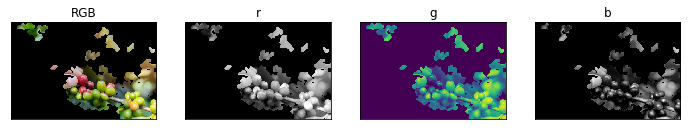

In [0]:
img_BGR=cv2.imread('se_cafe2.jpg',cv2.IMREAD_COLOR)
img_GRAY=cv2.cvtColor(img_BGR,cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img_RGB)

display4(img_RGB,r,g,b,"RGB","r","g","b")


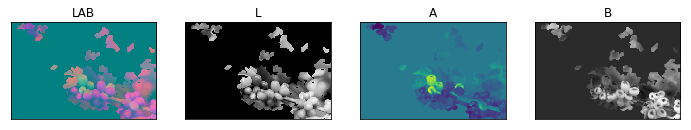

In [0]:
img_LAB=cv2.cvtColor(img_BGR, cv2.COLOR_BGR2LAB);
L,A,B = cv2.split(img_LAB)
display4(img_LAB,L,A,B,"LAB","L","A","B")



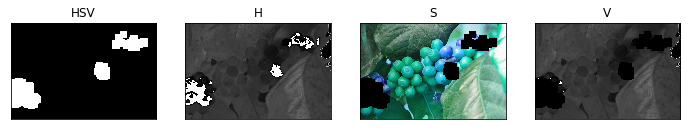

In [0]:
img_HSV=cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV);
H,S,V = cv2.split(img_HSV)
H2= np.array(255*(H/255)**2.2,dtype='uint8')
#kernel = np.ones((5,5), np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
H2=Threshold(H2,100)
H2=erosion = cv2.erode(H2,kernel,iterations = 2)
M_R = cv2.dilate(H2, kernel, iterations=12)
H2=negative(M_R)
new_im=cv2.bitwise_and(img_BGR,img_BGR,mask=H2)
img_HSV=cv2.cvtColor(new_im, cv2.COLOR_BGR2HSV);
H3,S,V = cv2.split(img_HSV)
display4(M_R,H,new_im,H3,"HSV","H","S","V")




# **Prepoceso**

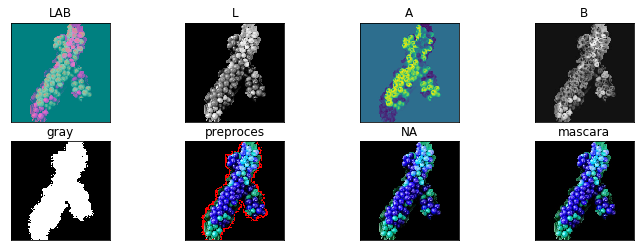

In [0]:
img_BGR=cv2.imread('se_cafe1.jpg',cv2.IMREAD_COLOR)
img_GRAY=cv2.cvtColor(img_BGR,cv2.COLOR_BGR2GRAY)
img_BGR2=copy.copy(img_BGR)

img_GRAY=Threshold(img_GRAY,1)

_, contours, _= cv2.findContours(image = img_GRAY, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)
img_con=cv2.drawContours(image = img_BGR2, contours = contours, contourIdx = -1, color = (255, 0, 0), thickness = 2)

#areas=[]
contours2Filter=[]

for idx,c in enumerate(contours):
    area=cv2.contourArea(c)
    #print(area)
    #areas.append(cv2.contourArea(c))
    if area <= 10000:
      contours2Filter.append(c)
      
      
img_BGR=cv2.drawContours(image = img_BGR, contours = contours2Filter, contourIdx = -1, color = (0, 0, 0), thickness = -1)

img_LAB=cv2.cvtColor(img_BGR, cv2.COLOR_BGR2LAB);
L,A,B = cv2.split(img_LAB)
NA=np.array(255*(A/255)**0.2,dtype='uint8')
NA=negative(NA)
H2=Threshold(NA,40)


display8(img_LAB,L,A,B,img_GRAY,img_con,img_BGR,img_BGR,"LAB","L","A","B","gray","preproces","NA","mascara")



# Detectar verdes y **amarillos**

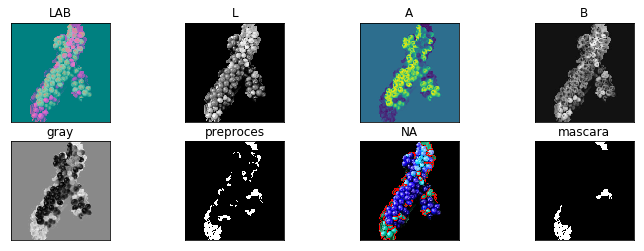

In [0]:
img_BGR=cv2.imread('se_cafe1.jpg',cv2.IMREAD_COLOR)
img_BGR2=copy.copy(img_BGR)

img_LAB=cv2.cvtColor(img_BGR, cv2.COLOR_BGR2LAB);
L,A,B = cv2.split(img_LAB)
img_NA=np.array(255*(A/255)**0.2,dtype='uint8')
img_NA=negative(img_NA)
img_Th=Threshold(img_NA,40)
img_Th2=copy.copy(img_Th)

_, contours, _= cv2.findContours(image = img_Th, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)
img_con=cv2.drawContours(image = img_BGR2, contours = contours, contourIdx = -1, color = (255, 0, 0), thickness = 2)

#areas=[]
contours2Filter=[]

for idx,c in enumerate(contours):
    area=cv2.contourArea(c)
    #print(area)
    #areas.append(cv2.contourArea(c))
    if area <= 1000:
      contours2Filter.append(c)
      
      
img_prep=cv2.drawContours(image = img_Th2, contours = contours2Filter, contourIdx = -1, color = (0, 0, 0), thickness = -1)



display8(img_LAB,L,A,B,img_NA,img_Th,img_con,img_prep,"LAB","L","A","B","gray","preproces","NA","mascara")

# **Detectar rojos**

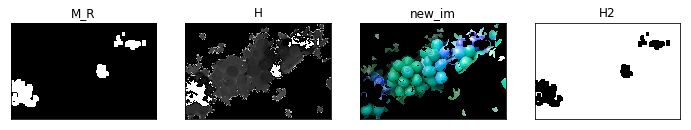

In [0]:
img_BGR=cv2.imread('se_cafe4.jpg',cv2.IMREAD_COLOR)
img_HSV=cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV);
H,S,V = cv2.split(img_HSV)
H2= np.array(255*(H/255)**2.2,dtype='uint8')
#kernel = np.ones((5,5), np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
H2=Threshold(H2,100)
H2=erosion = cv2.erode(H2,kernel,iterations = 2)
M_R = cv2.dilate(H2, kernel, iterations=6)
H2=negative(M_R)
new_im=cv2.bitwise_and(img_BGR,img_BGR,mask=H2)

display4(M_R,H,new_im,H2,"M_R","H","new_im","H2")

In [0]:
img_BGR=cv2.imread('se_cafe3.jpg',cv2.IMREAD_COLOR)
img_HSV=cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV);
H,S,V = cv2.split(img_HSV)
H2= np.array(255*(H/255)**2.2,dtype='uint8')
#kernel = np.ones((5,5), np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
H2=Threshold(H2,100)
H2=erosion = cv2.erode(H2,kernel,iterations = 2)
M_R = cv2.dilate(H2, kernel, iterations=6)
H2=negative(M_R)
new_im=cv2.bitwise_and(img_BGR,img_BGR,mask=H2)

display4(M_R,H,new_im,H2,"M_R","H","new_im","H2")

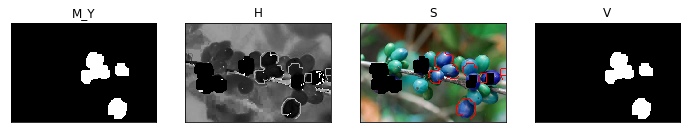

In [0]:

img_HSV=cv2.cvtColor(new_im, cv2.COLOR_BGR2HSV);
H_3,S,V = cv2.split(img_HSV)
H3=fraccionamiento(H_3,0,1)
H3= Threshold(H3,20)
H3=negative(H3)
H3=erosion = cv2.erode(H3,kernel,iterations = 3)
M_Y = cv2.dilate(H3, kernel, iterations=6)

_, contours, _= cv2.findContours(image = M_Y, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)
M_YC=cv2.drawContours(image = new_im, contours = contours, contourIdx = -1, color = (255, 0, 0), thickness = 2)

#areas=[]
contours2Filter=[]

for idx,c in enumerate(contours):
    area=cv2.contourArea(c)
    #print(area)
    #areas.append(cv2.contourArea(c))
    if area <= 1100:
      contours2Filter.append(c)
      
      
M_Y=cv2.drawContours(image = M_Y, contours = contours2Filter, contourIdx = -1, color = (0, 0, 0), thickness = -1)
#print(contours2Filter)    
display4(M_Y,H_3,M_YC,M_Y,"M_Y","H","S","V")